<a href="https://colab.research.google.com/github/ikikika/data_science/blob/titanic-kaggle/titanic_kaggle_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Define Problem
Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Import Dependencies

In [7]:
pip install catboost

     |████████████████████████████████| 64.8MB 57kB/s 


In [10]:
%matplotlib inline 
# Need to run this line to see the graphs

# Start python imports
import math, time, random, datetime

# Data manipulation
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine Learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Ignore warnings for now
# import warnings
# warnings.filterwarnings('ignore')

## Load the Data

In [1]:
import pandas as pd

train = pd.read_csv('https://raw.githubusercontent.com/ikikika/data_science/titanic-kaggle/titanic-kaggle/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/ikikika/data_science/titanic-kaggle/titanic-kaggle/test.csv')

### Find missing values

In [11]:
train.info()
# From here, we can see that 'Age', 'Cabin' and 'Embarked' has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


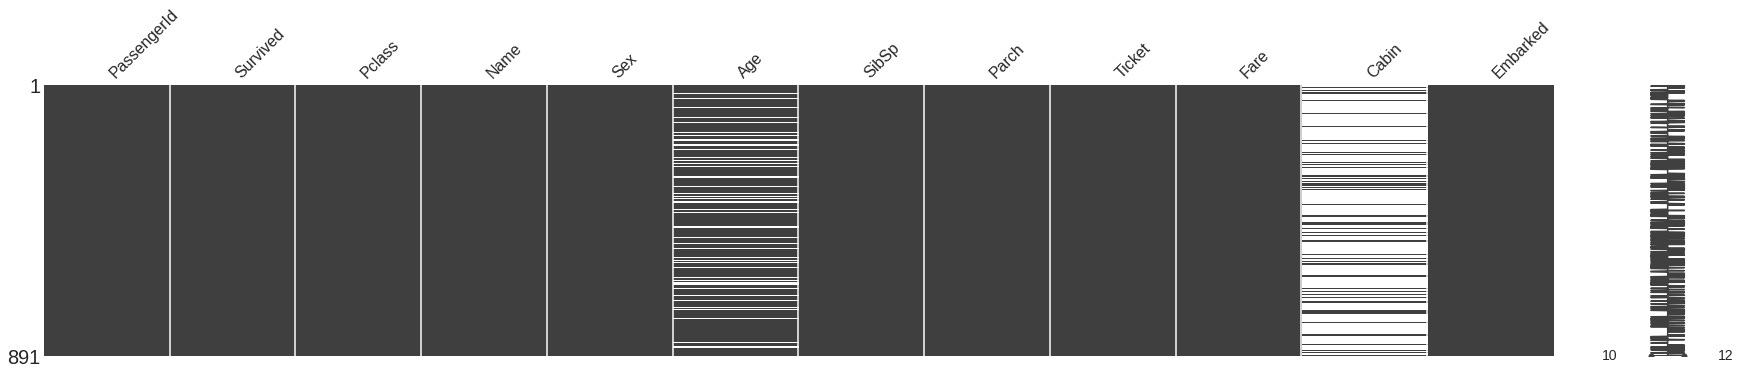

In [12]:
# Plot graphic of missing values
missingno.matrix(train, figsize=(30,5))

This is another way of visualising missing data.

This graph shows the position of the missing values, most of them are in the 'Age' and 'Cabin' columns.

In [21]:
# Function to show how many missing values there are
def find_missing_values(df, columns):
  '''
  Finds no of rows where certain columns are missing values
  :: param df :: = target dataframe
  :: param columns :: = list of columns
  '''
  missing_vals = {}
  print('Number of missing or NaN values for each column: ')
  df_length = len(df)
  for col in columns:
    total_column_values = df[col].value_counts().sum()
    missing_vals[col] = df_length - total_column_values
  return missing_vals

find_missing_values(train, columns=train.columns)

Number of missing or NaN values for each column: 


{'Age': 177,
 'Cabin': 687,
 'Embarked': 2,
 'Fare': 0,
 'Name': 0,
 'Parch': 0,
 'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 0,
 'Survived': 0,
 'Ticket': 0}

continue 25.30